1) Delivery_time -> Predict delivery time using sorting time.

Build a simple linear regression model by performing EDA and do necessary transformations and  
select the best model using R or Python.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Delivery_time.csv')

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
#data arrange in ascending order
data.groupby('Delivery Time')['Sorting Time'].sum().reset_index()

,Delivery Time,Sorting Time
0,8.00,2
1,9.50,3
2,10.75,4
3,11.50,3
4,12.03,3
5,13.50,4
6,13.75,6
7,14.88,4
8,15.35,6
9,16.68,7


In [7]:
data.shape

(21, 2)

In [8]:
#checking for null values
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
# check for any dupplicated values
data[data.duplicated()].sum()

Delivery Time    0.0
Sorting Time     0.0
dtype: float64

In [10]:
#copy the data into another variable, this doesnot affect the orginal dataset
data1=data.copy()

In [11]:
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Future Engineering / EDA Process

In [12]:
#Rename the column
data1=data.rename({'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'},axis=1)

In [13]:
data1.head(2)

,Delivery_time,Sorting_time
0,21.0,10
1,13.5,4


(array([4., 4., 3., 5., 5.]),
 array([ 2. ,  3.6,  5.2,  6.8,  8.4, 10. ]),
 <BarContainer object of 5 artists>)

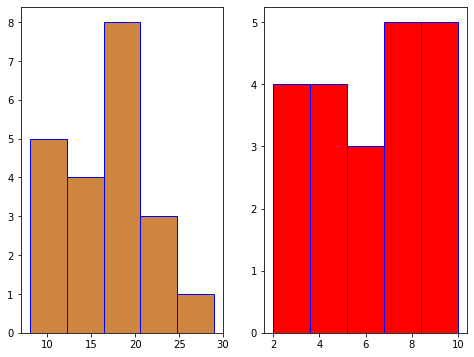

In [15]:
#Detection for outliers
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.hist(data1['Delivery_time'],facecolor='peru',edgecolor='blue',bins=5)
plt.subplot(1,2,2)
plt.hist(data1['Sorting_time'],facecolor='red',edgecolor='blue',bins=5)

<AxesSubplot:xlabel='Sorting_time', ylabel='sorting time'>

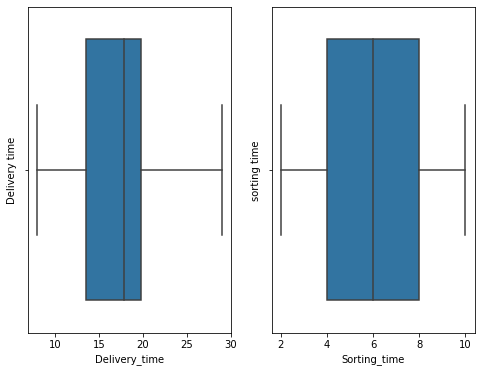

In [16]:
#Boxplot
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(data1['Delivery_time'])
plt.ylabel('Delivery time')
plt.subplot(1,2,2)
plt.ylabel('sorting time')
sns.boxplot(data1['Sorting_time'])

In [17]:
data1.describe()

,Delivery_time,Sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:>

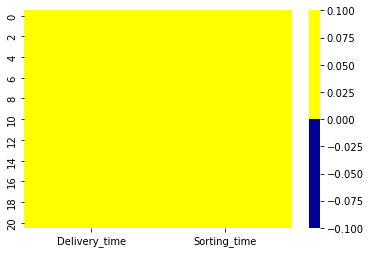

In [18]:
#  Heat Map
#  No null values so heat map shows single color ('No null values') 

cols = data1.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colours))

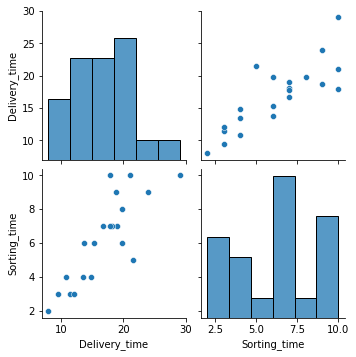

In [19]:
#scatter plot
sns.pairplot(data1)
plt.show()

In [20]:
#correlation of data
#correlation value 0.825 it means strength of the linear association is high.
data1.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


In [21]:
data1


,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [22]:
# NOrmalization
from sklearn.preprocessing import MinMaxScaler

In [31]:
data1.values
array=data1.values
scaler=MinMaxScaler(feature_range=(0,1))
rescaled=scaler.fit_transform(array)
print(rescaled)


[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]
 [0.35 0.5 ]
 [0.52 0.62]
 [0.07 0.12]
 [0.47 1.  ]
 [0.51 0.88]
 [0.56 0.75]
 [0.13 0.25]
 [0.41 0.62]
 [0.17 0.12]
 [0.19 0.12]
 [0.33 0.25]
 [0.27 0.5 ]
 [0.48 0.62]
 [0.   0.  ]
 [0.47 0.62]
 [0.64 0.38]]


In [32]:
#Standardization
from sklearn.preprocessing import StandardScaler
array=data1.values
scaler=StandardScaler().fit(array)
rescaled=scaler.transform(array)
print(rescaled)

[[ 0.85  1.54]
 [-0.66 -0.88]
 [ 0.6  -0.08]
 [ 1.46  1.13]
 [ 2.47  1.54]
 [-0.29 -0.08]
 [ 0.45  0.33]
 [-1.47 -1.29]
 [ 0.22  1.54]
 [ 0.4   1.13]
 [ 0.61  0.73]
 [-1.22 -0.88]
 [-0.02  0.33]
 [-1.07 -1.29]
 [-0.96 -1.29]
 [-0.39 -0.88]
 [-0.61 -0.08]
 [ 0.27  0.33]
 [-1.78 -1.69]
 [ 0.21  0.33]
 [ 0.95 -0.48]]


In [37]:
#speed up  EDA process
import pandas_profiling as pp

In [38]:
EDA_report=pp.ProfileReport(data1)
EDA_report.to_file('data1.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Model Building

In [42]:
#simple linear regression
import statsmodels.formula.api as smf
data1.head(2)

,Delivery_time,Sorting_time
0,21.0,10
1,13.5,4


Delivery_time=Dependent variable;  
Sorting_time = Independent variable.
Predict delivery time using sorting time.

In [44]:
first_model=smf.ols('Delivery_time~Sorting_time',data=data1).fit()

In [46]:
first_model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [48]:
first_model.rsquared

0.6822714748417231

In [49]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        13:06:37   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#for improve the R square use log(above or near 0.80)
second_model=smf.ols('np.log(Delivery_time)~Sorting_time',data=data1).fit()

In [52]:
second_model.rsquared

0.7109478980584187

In [53]:
Third_model=smf.ols('(Delivery_time)~np.log(Sorting_time)',data=data1).fit()

In [54]:
Third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           2.64e-06
Time:                        13:09:37   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
data1['Sorting_time_sq']=data1.Sorting_time**2

Fourth_model=smf.ols('np.log(Delivery_time)~Sorting_time+Sorting_time_sq',data=data1).fit()

In [68]:
Fourth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Wed, 19 Oct 2022   Prob (F-statistic):           2.20e-06
Time:                           13:16:23   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_time        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
Fourth_model.rsquared

0.7648666342953728

In [ ]:
#Comparing with second_model , fourth_model has high R-squared value=0.764 (near to 0.8)
#so it is the best Model 